In [14]:
import scipy.io as sio
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# load data

In [15]:
data_mat = sio.loadmat('data-lasso.mat')

In [16]:
# check keys
data_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'b0', 'y'])

In [17]:
X = data_mat['X']
b0 = data_mat['b0']
y = data_mat['y']
print('data shape')
print('X:',X.shape)
print('b0:',b0.shape)
print('y:',y.shape)

data shape
X: (200, 100)
b0: (100, 1)
y: (200, 1)


C:\Users\porntip.k\AppData\Local\Temp/ipykernel_30712/2459889641.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, y)
d:\Farofang\NIDA\bads7603-Optimization\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Farofang\NIDA\bads7603-Optimization\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+00, tolerance: 1.154e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fas

Text(0, 0.5, 'coefs')

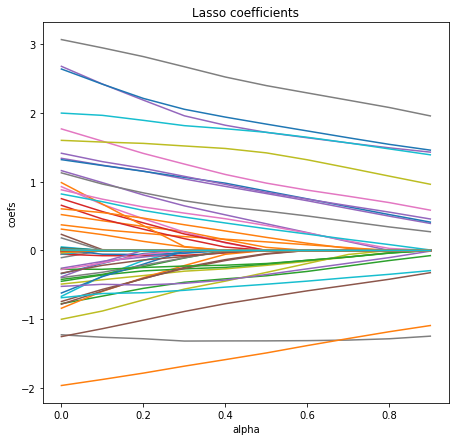

In [32]:
# Build Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 1, 0.1)
coefsLasso = []
for i in range (alphasLasso.shape[0]):
    lasso = linear_model.Lasso(alpha=alphasLasso[i], fit_intercept=False)
    lasso.fit(X, y)
    coefsLasso.append(lasso.coef_)

# Build Lasso coefficient plots
plt.figure(figsize = (16,7))
plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
